In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], 
  [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])
#tf.config.experimental.set_memory_growth(gpus[0], True)

2.10.1
2.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, 
                        input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 64)                1384512   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,385,482
Trainable params: 1,385,482
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(train_images, train_labels, batch_size=128, validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
469/469 [==============================] - 8s 4ms/step - loss: 0.4531 - accuracy: 0.8394 - val_loss: 0.3474 - val_accuracy: 0.8758
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.8941 - val_loss: 0.3085 - val_accuracy: 0.8867
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9087 - val_loss: 0.2879 - val_accuracy: 0.8943
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2161 - accuracy: 0.9213 - val_loss: 0.2831 - val_accuracy: 0.8989
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1905 - accuracy: 0.9305 - val_loss: 0.2831 - val_accuracy: 0.9027
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1690 - accuracy: 0.9392 - val_loss: 0.2738 - val_accuracy: 0.8992
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1474 - accuracy: 0.9470 - val_loss: 0.2819 - val_accuracy: 0.9041
Epoch 

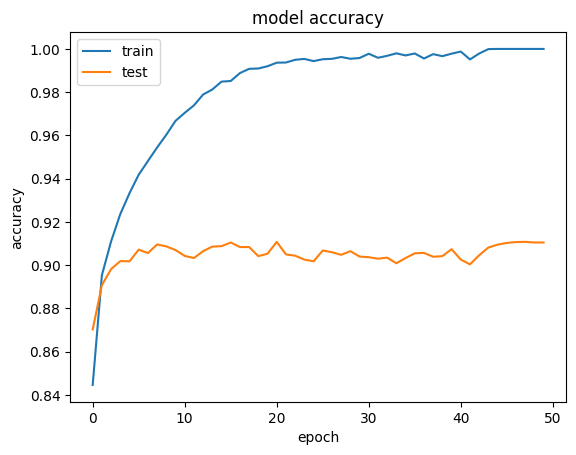

In [6]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

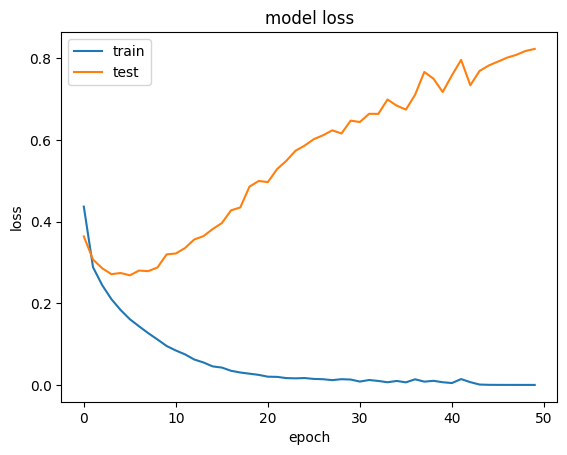

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ผล train ดีมาก แต่ validation แย่มากกกก
ผลความแม่นยำที่ออกมาก็มีแนวโน้มคล้ายๆเดิม คือเก่งกับข้อมูลชุด train มากๆ แต่ทำงานได้แย่มากๆเมื่อเจอข้อมูลที่ไม่เคยเห็น <br>
แต่จากผลนี้จริงๆแล้วไม่ได้แปลว่า CNN นั้นไม่ดีนะครับ CNN นั้นดีมากๆแต่แค่องค์ประกอบอันอื่นยังไม่ครบ เดี๋ยวเราจะไปดูกันต่อว่าอะไรจะมาช่วยในส่วนนี้ได้
***ลองดูอีกหนึ่งไฟล์ดูว่าข้อสันนิษฐานของเราเป็นจริงหรือเปล่า Convolution + Dense 256***